## Contents

- library and data import
- key questions 1 - 5D

## Library and data import

In [2]:
# library imports

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [3]:
# create a string for the project folder path

path = r'/Users/Ashley/Desktop/Adam/Achievement 4/Instacart Analysis'

In [4]:
# import the latest data frame

df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'data_4_10.pkl'))

In [5]:
# allow notebook to show all columns of the data frame

pd.set_option('display.max_columns', None)

In [6]:
# verify data frame import was successful

df.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,first_order,add_to_cart_order,reordered,_merge,busiest_day,price_range_loc,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_price,spending_flag,days_since_median,frequency_flag,first_name,last_name,gender,state,age,date_joined,num_of_dependants,fam_status,income,region,exclusion_flag,age_profile,income_profile,parent_flag,order_profile,customer_profile
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,3.0,False,5,0,both,Regularly Busy,Mid Range Product,Regular Days,Most Orders,32,Regular Customer,6.935811,Low Spender,8.0,Frequent Customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,Normal Activity,Old,Moderate Earner,Parent,None Assigned,Old Moderate Earning Parent
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,20.0,False,1,1,both,Regularly Busy,Mid Range Product,Regular Days,Average Orders,32,Regular Customer,6.935811,Low Spender,8.0,Frequent Customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,Normal Activity,Old,Moderate Earner,Parent,None Assigned,Old Moderate Earning Parent
2,907,Premium Sliced Bacon,106,12,20.0,3160996,138,1,5,13,NaN,True,4,0,both,Regularly Busy,High Range Product,Regular Days,Most Orders,32,Regular Customer,6.935811,Low Spender,8.0,Frequent Customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,Normal Activity,Old,Moderate Earner,Parent,Meat Eater,Old Moderate Earning Parent
3,907,Premium Sliced Bacon,106,12,20.0,2254091,138,10,5,14,6.0,False,1,1,both,Regularly Busy,High Range Product,Regular Days,Most Orders,32,Regular Customer,6.935811,Low Spender,8.0,Frequent Customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,Normal Activity,Old,Moderate Earner,Parent,Meat Eater,Old Moderate Earning Parent
4,1000,Apricots,18,10,12.9,505689,138,9,6,12,7.0,False,5,0,both,Regularly Busy,Mid Range Product,Regular Days,Most Orders,32,Regular Customer,6.935811,Low Spender,8.0,Frequent Customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,Normal Activity,Old,Moderate Earner,Parent,None Assigned,Old Moderate Earning Parent


## Key Question 1- busiest days and hours

In [14]:
# create a value count of the orders day of week column

df['orders_day_of_week'].value_counts(dropna = False).sort_index()

0    6204182
1    5660230
2    4213830
3    3840534
4    3783802
5    4205791
6    4496490
Name: orders_day_of_week, dtype: int64

In [15]:
# create a value count of the orders hour of day column

df['order_hour_of_day'].value_counts(dropna = False).sort_index()

0      218769
1      115700
2       69375
3       51281
4       53242
5       87961
6      290493
7      891054
8     1718118
9     2454203
10    2761760
11    2736140
12    2618532
13    2660954
14    2689136
15    2662144
16    2535202
17    2087654
18    1636502
19    1258305
20     976156
21     795637
22     634225
23     402316
Name: order_hour_of_day, dtype: int64

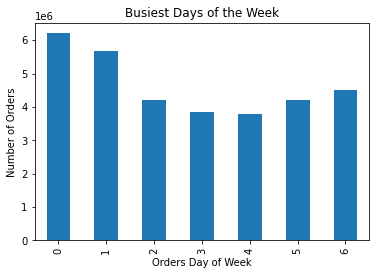

In [56]:
# Create bar chart for days

bar_busy_days = df['orders_day_of_week'].value_counts().sort_index().plot.bar(title='Busiest Days of the Week', xlabel='Orders Day of Week', ylabel='Number of Orders')

In [17]:
# the busiest days are saturday and sunday

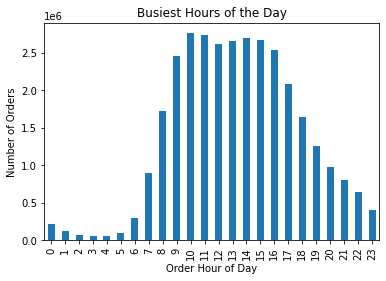

In [55]:
# Create a bar chart for hours

bar_busy_hours = df['order_hour_of_day'].value_counts().sort_index().plot.bar(title='Busiest Hours of the Day', xlabel='Order Hour of Day', ylabel='Number of Orders')

In [20]:
# the busiest hours are 9 AM through 4 PM

In [57]:
# export both charts

bar_busy_hours.figure.savefig(os.path.join(path, '04 Analysis', 'Visuals', 'E10', 'bar_busy_hours.png'))
bar_busy_days.figure.savefig(os.path.join(path, '04 Analysis', 'Visuals', 'E10', 'bar_busy_days.png'))

## Key Question 2- times of day with most revenue

In [23]:
# chart created during E9. Moved the exported chart to exercise 10 folder. 

## Key Question 3- price range groupings

In [71]:
# Create histogram of product prices

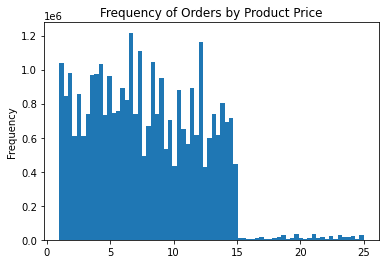

In [70]:
hist_prices = df['prices'].plot.hist(bins = 70, title='Frequency of Orders by Product Price')

In [72]:
# export

hist_prices.figure.savefig(os.path.join(path, '04 Analysis', 'Visuals', 'E10', 'KQ3 hist_prices.png'))

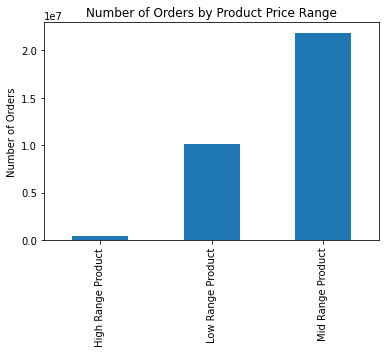

In [62]:
# create a bar chart showing frequency of the different price range buckets

bar_price_range = df['price_range_loc'].value_counts().sort_index().plot.bar(title='Number of Orders by Product Price Range', ylabel='Number of Orders')

In [63]:
# Export

bar_price_range.figure.savefig(os.path.join(path, '04 Analysis', 'Visuals', 'E10', 'KQ3 bar_price_range.png'))

## Key Question 4- department popularity

In [38]:
df['department_id'].value_counts(dropna = False)

4     9479291
16    5398747
19    2887550
7     2688123
1     2234743
13    1875369
3     1172428
15    1068058
20    1051249
9      866627
17     738666
12     708927
14     703033
11     447572
18     423802
6      269253
5      153696
8       97716
21      69145
2       36291
10      34573
Name: department_id, dtype: int64

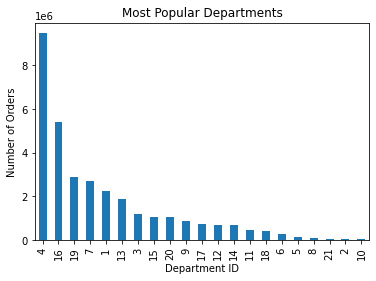

In [64]:
bar_dept = df['department_id'].value_counts().plot.bar(title='Most Popular Departments', xlabel='Department ID', ylabel='Number of Orders')

In [41]:
# the most popular departments are product and dairy/eggs

In [65]:
# export
bar_dept.figure.savefig(os.path.join(path, '04 Analysis', 'Visuals', 'E10', 'KQ4 bar_dept.png'))

## 5A- what's the distribution among users in regard to their brand loyalty

In [7]:
df.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,first_order,add_to_cart_order,reordered,_merge,busiest_day,price_range_loc,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_price,spending_flag,days_since_median,frequency_flag,first_name,last_name,gender,state,age,date_joined,num_of_dependants,fam_status,income,region,exclusion_flag,age_profile,income_profile,parent_flag,order_profile,customer_profile
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,3.0,False,5,0,both,Regularly Busy,Mid Range Product,Regular Days,Most Orders,32,Regular Customer,6.935811,Low Spender,8.0,Frequent Customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,Normal Activity,Old,Moderate Earner,Parent,None Assigned,Old Moderate Earning Parent
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,20.0,False,1,1,both,Regularly Busy,Mid Range Product,Regular Days,Average Orders,32,Regular Customer,6.935811,Low Spender,8.0,Frequent Customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,Normal Activity,Old,Moderate Earner,Parent,None Assigned,Old Moderate Earning Parent
2,907,Premium Sliced Bacon,106,12,20.0,3160996,138,1,5,13,NaN,True,4,0,both,Regularly Busy,High Range Product,Regular Days,Most Orders,32,Regular Customer,6.935811,Low Spender,8.0,Frequent Customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,Normal Activity,Old,Moderate Earner,Parent,Meat Eater,Old Moderate Earning Parent
3,907,Premium Sliced Bacon,106,12,20.0,2254091,138,10,5,14,6.0,False,1,1,both,Regularly Busy,High Range Product,Regular Days,Most Orders,32,Regular Customer,6.935811,Low Spender,8.0,Frequent Customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,Normal Activity,Old,Moderate Earner,Parent,Meat Eater,Old Moderate Earning Parent
4,1000,Apricots,18,10,12.9,505689,138,9,6,12,7.0,False,5,0,both,Regularly Busy,Mid Range Product,Regular Days,Most Orders,32,Regular Customer,6.935811,Low Spender,8.0,Frequent Customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,Normal Activity,Old,Moderate Earner,Parent,None Assigned,Old Moderate Earning Parent


In [17]:
df['loyalty_flag'].value_counts(dropna = False)

Regular Customer    15876776
Loyal Customer      10284093
New Customer         6243990
Name: loyalty_flag, dtype: int64

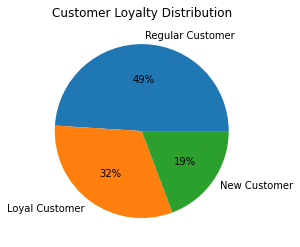

In [37]:
loyalty_pie = df['loyalty_flag'].value_counts().plot.pie(title='Customer Loyalty Distribution', ylabel=' ', autopct='%1.0f%%')

In [38]:
# export
loyalty_pie.figure.savefig(os.path.join(path, '04 Analysis', 'Visuals', 'E10', 'KQ5A loyalty_pie.png'))

## 5B- are there differences in ordering habits based on a customers loyalty status

In [44]:
# Cross loyalty status and spending flag

loyalty_spend_cross = pd.crosstab(df['spending_flag'], df['loyalty_flag'], dropna = False)

In [45]:
loyalty_spend_cross

loyalty_flag,Loyal Customer,New Customer,Regular Customer
spending_flag,,,
High Spender,216600,114831,302814
Low Spender,10067493,6129159,15573962


In [46]:
loyalty_spend_cross.to_clipboard()

Roughly 2% of each loyalty category is high spenders. No signifigant difference between them. 

In [48]:
# Cross loyalty status and frequency flag

loyalty_freq_cross = pd.crosstab(df['frequency_flag'], df['loyalty_flag'], dropna = False)

In [49]:
loyalty_freq_cross

loyalty_flag,Loyal Customer,New Customer,Regular Customer
frequency_flag,,,
Frequent Customer,10279960,1648671,9631222
Non Frequent Customer,0,2724962,911475
Regular Customer,4133,1870352,5334079


In [50]:
loyalty_freq_cross.to_clipboard()

Analysis done in excel and chart in final report. 

## 5C- are there differences in ordering habits based on a customers region

In [51]:
# Cross region and spending flag

region_spend_cross = pd.crosstab(df['spending_flag'], df['region'], dropna = False)

In [52]:
region_spend_cross

region,Midwest,Northeast,South,West
spending_flag,,,,
High Spender,155975,108225,209691,160354
Low Spender,7441350,5614511,10582194,8132559


In [53]:
region_spend_cross.to_clipboard()

In [54]:
# cross region and frequency flag

region_freq_cross = pd.crosstab(df['frequency_flag'], df['region'], dropna = False)

In [56]:
region_freq_cross.to_clipboard()

Analysis done in excel and charts in final report. 

## 5D- is there a connection between age and family status in terms of ordering habits

In [58]:
# Cross age profile and spending flag

age_spend_cross = pd.crosstab(df['spending_flag'], df['age_profile'], dropna = False)

In [59]:
age_spend_cross

age_profile,Middle Age,Old,Young
spending_flag,,,
High Spender,210643,308766,114836
Low Spender,9972345,15822664,5975605


In [60]:
age_spend_cross.to_clipboard()

In [61]:
# Cross age profile and frequency flag

age_freq_cross = pd.crosstab(df['frequency_flag'], df['age_profile'], dropna = False)

In [62]:
age_freq_cross

age_profile,Middle Age,Old,Young
frequency_flag,,,
Frequent Customer,6765986,10734254,4059613
Non Frequent Customer,1145776,1808401,682260
Regular Customer,2271226,3588770,1348568


In [63]:
age_freq_cross.to_clipboard()

In [64]:
# Cross family status and spending flag

fam_spend_cross = pd.crosstab(df['spending_flag'], df['fam_status'], dropna = False)

In [65]:
fam_spend_cross

fam_status,divorced/widowed,living with parents and siblings,married,single
spending_flag,,,,
High Spender,52698,29389,451324,100834
Low Spender,2719114,1521214,22305429,5224857


In [66]:
fam_spend_cross.to_clipboard()

In [71]:
# Cross family status and frequency flag

fam_freq_cross = pd.crosstab(df['frequency_flag'], df['fam_status'], dropna = False)

In [72]:
fam_freq_cross

fam_status,divorced/widowed,living with parents and siblings,married,single
frequency_flag,,,,
Frequent Customer,1852101,1047100,15137381,3523271
Non Frequent Customer,306903,175019,2564637,589878
Regular Customer,612808,328484,5054730,1212542


In [73]:
fam_freq_cross.to_clipboard()